# What is Linear Regression?






It is a relationship between 2 variables x and y where x = input or independent variables y = output or dependent value This relationship is in the form of a straight line that best tries to fit each variable.

Mathematically it can be defined as y = mx + c where x and y are as defined above, m = slope or coefficient of regression c = constant

General view of a straight line : y = mx + c


Linear regression is the simplest and most widely used statistical technique for predictive modeling. It basically gives us an equation, where we have our features as independent variables, on which our target variable is dependent upon.

So what does the equation look like? Linear regression equation looks like this:


![picture](https://drive.google.com/uc?export=view&id=17WEzU5rwsAskDGDeqlcJtDS-4XJUdJUr)

Here, we have Y as our dependent variable/ output variable,
X’s are the independent variables and all thetas are the coefficients.

Coefficients are basically the weights assigned to the features, based on their importance. LEARNING THEM AND HOW TO LEARN THEM is Core of Machine learning.

So, firstly let us try to understand linear regression with only one feature, i.e., only one independent variable. Therefore our equation becomes,

![](https://drive.google.com/uc?export=view&id=1OEP-ExueAHiU-A5cf8d6ql-Ob7qaPblY)

# How to find the Line of Best Fit


As we can easily understand for different values of theta values, we will have different lines possible[Model Space], How to select the Best fit Line?

The main purpose of the best fit line is that our predicted values should be closer to our actual or the observed values, because there is no point in predicting values which are far away from the real values. In other words, we tend to minimize the difference between the values predicted by us and the observed values, and which is actually termed as error. Graphical representation of error is as shown below. These errors are also called as residuals. The residuals are indicated by the vertical lines showing the difference between the predicted and actual value.

![](https://drive.google.com/uc?export=view&id=1HL4bhB_RbYMV2GtDnk5x-GDb0JMScc7h)

# To Reduce Error, you need to first figure out how to define error?




Okay, now we know that our main objective is to find out the error and minimize it. But before that, let’s think of how to deal with the first part, that is, to calculate the error. We already know that error is the difference between the value predicted by us and the observed value. Let’s just consider three ways through which we can calculate error:

![](https://drive.google.com/uc?export=view&id=1np999RscKZSCmVPQyscPS73HuHZBwQ2B)





# The Cost function

So, we need to minimize these costs. Therefore we introduce a cost function, which is basically used to define and measure the error of the model.

![](https://drive.google.com/uc?export=view&id=1Rpm6bnvSAiK6q0qiUxJ9skyNRxK1Z5gy)

If you look at this equation carefully, it is just similar to ***sum of squared errors***, with just a factor of 1/2m is multiplied in order to ease mathematics.
(***WE CAN UNDERSTAND THIS ONCE WE COMPLETE GENERALISED LINEAR MODELS***)

***OUR BEST FIT LINE PARAMETERS WOULD BE THE PARAMETERS FOR WHICH THE COST FUNCTION WOULD GIVES MINIMUM VALUE, SO WE NEED TO MINIMISE THIS FUNCTION.***

**QUESTIONS**:

***HOW DO YOU DECIDED THIS COST FUNCTION TO BE EFFECTIVE ? OR WHAT IS THE BENEFIT WE GET BY CHOOSING THIS AS COST FUNCTION OVER OTHERS? ***

***DOES FOR ALL KINDS OF DATA THIS COST FUNCTION EXISTS AND HAVE MINIMUM VALUE?***

***IS THE MINIMUM VALUE UNIQUE ? ***



# HOW TO MINIMIZE THE COST?


There are several methods to minimize a function and obtain parameters at which minimum values occur(local minimum should atleast be guarenteed)
1. Closed Form
2. Gradient Descent
3. NR Method

We will discuss the first 2 methods.

Before that first let's load and make dataset ready to proceed further.

# Loading dataset and accessing it

In [ ]:
import csv
def load_data(filename):
    dataset = []
    csvfile = open(filename, newline = '')
    reader = csv.reader(csvfile)
    for i in reader:
        dataset.append(i)
    return dataset

In [67]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path_link = "/content/drive/MyDrive/AI511/TA Session 1/LifeExpectancyData.csv"
dataframe = pd.read_csv(path_link)
dataframe.head()

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,...,83,6.0,8.16,65.0,0.1,584.259210,15.6,15.75,0.479,10.1
1,1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,...,86,58.0,8.18,62.0,0.1,612.696514,15.6,15.75,0.476,10.0
2,2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,...,89,62.0,8.13,64.0,0.1,631.744976,15.6,15.75,0.470,9.9
3,3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,...,93,67.0,8.52,67.0,0.1,669.959000,15.6,15.75,0.463,9.8
4,4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,...,97,68.0,7.87,68.0,0.1,63.537231,15.6,15.75,0.454,9.5


In [69]:
dataframe.index

RangeIndex(start=0, stop=2888, step=1)

In [70]:
dataframe.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Status', 'Life expectancy',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'thinness 1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Some columns have really unusual spaced naming . so let's rename them

In [71]:
dataframe.rename({'Life expectancy ':'Life expectancy',' BMI ':'BMI',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness 1-19 years',' thinness 5-9 years':'thinness 5-9 years','Measles ':'Measles','under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria'},axis=1,inplace=True)

In [72]:
dataframe.info()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2888 non-null   int64  
 1   Country                          2888 non-null   object 
 2   Year                             2888 non-null   int64  
 3   Status                           2888 non-null   int64  
 4   Life expectancy                  2888 non-null   float64
 5   Adult Mortality                  2888 non-null   float64
 6   infant deaths                    2888 non-null   int64  
 7   Alcohol                          2888 non-null   float64
 8   percentage expenditure           2888 non-null   float64
 9   Hepatitis B                      2888 non-null   float64
 10  Measles                          2888 non-null   int64  
 11  BMI                              2888 non-null   float64
 12  under-five deaths   

,Unnamed: 0,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,1455.376039,2007.515235,0.177285,69.349377,163.357341,30.314751,4.557559,749.475611,79.396496,2442.514543,...,41.985803,82.672091,5.925059,82.437673,1.749792,7440.053148,4.721745,4.737639,0.634450,12.148653
std,847.801556,4.606938,0.381976,9.495441,124.018934,118.891670,4.073372,2003.090073,24.366913,11561.322467,...,161.743345,23.333655,2.437270,23.648907,5.116551,13469.612322,3.973551,4.009365,0.202597,3.147761
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,722.750000,2004.000000,0.000000,63.475000,73.000000,0.000000,0.680000,5.049462,74.000000,0.000000,...,0.000000,78.000000,4.300000,78.000000,0.100000,560.979104,1.600000,1.500000,0.511750,10.400000
50%,1445.500000,2008.000000,0.000000,72.200000,143.000000,3.000000,3.685000,67.687008,88.000000,17.000000,...,4.000000,93.000000,5.720000,93.000000,0.100000,2934.841557,3.350000,3.400000,0.675000,12.300000
75%,2179.250000,2012.000000,0.000000,75.800000,225.000000,21.000000,7.680000,454.422430,96.000000,352.250000,...,26.000000,97.000000,7.430000,97.000000,0.800000,5598.752534,7.200000,7.200000,0.782000,14.300000
max,2937.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,15.600000,15.750000,0.948000,20.700000


In [73]:

dataframe = dataframe.loc[:, ['Schooling', 'Income composition of resources', 'BMI', 'Status', 'Diphtheria', 'Life expectancy']]

In [74]:
dataframe.head(5)

,Schooling,Income composition of resources,BMI,Status,Diphtheria,Life expectancy
0,10.1,0.479,19.1,0,65.0,65.0
1,10.0,0.476,18.6,0,62.0,59.9
2,9.9,0.470,18.1,0,64.0,59.9
3,9.8,0.463,17.6,0,67.0,59.5
4,9.5,0.454,17.2,0,68.0,59.2


# Feature Scaling( using Z transformation method )

In [75]:
class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

In [76]:
for feature in dataframe.columns:
    if feature not in ('Country', 'Status', 'Life expectancy'):
        dataframe[feature] = dataframe[feature].apply(Standardizer(dataframe[feature].mean(), dataframe[feature].std()).scale)

# Test Train Split

Before proceeding lets first shuffle the dataframe to get train, test sets to not be biased.

In [77]:
dataframe.sample(frac = 1);

In [78]:
def train_test(dataframe, split_value):
    n = int(split_value*len(dataframe))

    train_data = dataframe.iloc[:n, :]
    test_data =  dataframe.iloc[n:, :]

    return train_data,test_data

train_data, test_data = train_test(dataframe, 0.8)

# Metrics



define metrics class so it becomes easy to call standard mertics later after building models

Mean Absolute Error (MAE): The distance between any data point and the best fit line is called as prediction error. The absolute mean of it is called as Mean Absolute Error (MAE).

Value range: 0 to ∞ Best value = 0.0 or we can also say that lower the value, better it is.

![](https://drive.google.com/uc?export=view&id=1k_kFGNX4VpBC6DypG3cWGIiWAkRk4l3A)

Mean Squared Error (MSE):
The summation of square of all the distances between any data point and the best fit line divided by the total number of data points (mean) gives us a value called as Mean Squared Error.

![](https://drive.google.com/uc?export=view&id=1AAAyFuVDrdQTpaLru5WUzPxQZHmxSaVs)

Root Mean Squared Error(RMSE):
It is Square root of Mean Squared Error

R2 Score - Coefficient of Determination:
R2 Score is defined as regression sum of squares divided by the total sum of squares.

Best value = 1.0 or we can also say that more the value close to 1, better it is.

Let's see the formula and then we will find all the parameters needed to calculate the value of R-square:

![](https://drive.google.com/uc?export=view&id=1Vq0Lt9CQSS8gziFJkAe-PNCZgLmSUSjE)


In [79]:
class Metrics:
    def __init__(self):
        self.mse = 0
        self.mae = 0

    def MSE(self, pred, actual):
        error = 0
        for i in range(len(pred)):
            error += (pred[i]-actual[i])**2
        self.mse =  error/len(pred)
        return self.mse

    def MAE(self, pred, actual):
        error = 0
        for i in range(len(pred)):
            error += abs(pred[i]- actual[i])
        self.mae = error/len(pred)
        return self.mae

# Linear Regression

# Closed form




![](https://drive.google.com/uc?export=view&id=1rmBiU_aFtyyKAvduUhcnGitYIPu8Yofa)
![](https://drive.google.com/uc?export=view&id=1r8cEm5_vRCtB8jBVb9Q5eLGspDMNnH3y),
![](https://drive.google.com/uc?export=view&id=1rb0zEWSolCk6LuHiK1sYLKOA7Y1ULYQo)


1. Univariate linear regression using closed form solution to get optimal parameters


We consider schooling feature to be our input feature for univariate linear regression.

In [80]:
train_data.head(5)

,Schooling,Income composition of resources,BMI,Status,Diphtheria,Life expectancy
0,-0.650829,-0.767287,-0.957844,0,-0.737356,65.0
1,-0.682597,-0.782095,-0.982891,0,-0.864212,59.9
2,-0.714366,-0.811711,-1.007938,0,-0.779642,59.9
3,-0.746135,-0.846262,-1.032984,0,-0.652786,59.5
4,-0.841440,-0.890685,-1.053022,0,-0.610501,59.2


In [81]:
X_train_univariate = train_data['Schooling'].to_numpy()
Y_train = train_data['Life expectancy'].to_numpy()

In [82]:
X_train_univariate = np.vstack((np.ones(len(X_train_univariate)), X_train_univariate)).T
X_train_univariate

array([[ 1.        , -0.65082874],
       [ 1.        , -0.68259735],
       [ 1.        , -0.71436597],
       ...,
       [ 1.        ,  0.55637864],
       [ 1.        ,  0.14338664],
       [ 1.        ,  0.17515526]])

Our closed form solution for theta is  [  (Xtranspose . X)inverse * (Xtranspose * Y) ]

In [83]:
first = np.linalg.inv(np.dot(X_train_univariate.T, X_train_univariate))
second = np.dot(X_train_univariate.T, Y_train)
theta = np.dot(first, second)
theta

array([69.60911595,  6.85548291])

In [84]:
def prediction(row,parameters):
    predicted = 0
    for i in range(len(row)):
        predicted += row[i]*parameters[i]
    return predicted

In [85]:
metrics = Metrics()

X_test_univariate = test_data['Schooling'].to_numpy()
Y_test = test_data['Life expectancy'].to_numpy()

predictions = []
for i in range(len(Y_test)):
    predictions.append(prediction([1.0, X_test_univariate[i]], theta))

Mse = metrics.MSE(predictions, Y_test)
Mae = metrics.MAE(predictions, Y_test)

print("******* Univariate linear regression using closed form solution***********")
print("The Parameters of our model are: ", theta[0], theta[1])
print("The Mean square error of model is: " , Mse)
print("The Mean absolute error of mode is: ", Mae)

******* Univariate linear regression using closed form solution***********
The Parameters of our model are:  69.60911595291441 6.855482912557343
The Mean square error of model is:  53.28557809281781
The Mean absolute error of mode is:  5.160922952548217


2. Multivariate linear regression


In [86]:
X_train_multi_all = train_data.loc[:, train_data.columns != 'Life expectancy'].to_numpy()
X_test_multi_all = test_data.loc[:, test_data.columns != 'Life expectancy'].to_numpy()

In [87]:
print(X_train_multi_all)

[[-0.65082874 -0.76728742 -0.95784408  0.         -0.73735641]
 [-0.68259735 -0.78209515 -0.98289088  0.         -0.86421217]
 [-0.71436597 -0.81171062 -1.00793768  0.         -0.77964167]
 ...
 [ 0.55637864  1.00964076 -1.73930422  1.          0.53120117]
 [ 0.14338664  0.92079436 -1.7543323   1.          0.57348642]
 [ 0.17515526  0.91585844 -0.41683321  1.          0.53120117]]


In [88]:
X_train_multi_all = np.hstack((np.ones((len(X_train_multi_all), 1)), X_train_multi_all))
X_test_multi_all = np.hstack((np.ones((len(X_test_multi_all), 1)), X_test_multi_all))


In [89]:
first = np.linalg.inv(np.dot(X_train_multi_all.T, X_train_multi_all))
second = np.dot(X_train_multi_all.T, Y_train)
theta = np.dot(first, second)
theta

array([69.21658267,  3.12484723,  2.49792582,  1.38192508,  1.70572163,
        1.71194258])

In [90]:
metrics = Metrics()

Y_test = test_data['Life expectancy'].to_numpy()

predictions = []
for i in range(len(Y_test)):
    predictions.append(prediction(X_test_multi_all[i], theta))

Mse = metrics.MSE(predictions, Y_test)
Mae = metrics.MAE(predictions, Y_test)

print("******* Multivariate linear regression using closed form solution when all input features selected***********")
print("The Parameters of our model are: ", theta)
print("The Mean square error of model is: " , Mse)
print("The Mean absolute error of mode is: ", Mae)

******* Multivariate linear regression using closed form solution when all input features selected***********
The Parameters of our model are:  [69.21658267  3.12484723  2.49792582  1.38192508  1.70572163  1.71194258]
The Mean square error of model is:  41.90684061616481
The Mean absolute error of mode is:  4.675646342548643


# Gradient Descent



![](https://drive.google.com/uc?export=view&id=1xXtE21EQ0pxWLLWAV5YZE0hrRqQk3uSz)

**Widrow-Hoff Learning rule**
The rule is called the LMS update rule (LMS stands for “least mean squares”),
and is also known as the Widrow-Hoff learning rule



**Batch Gradient Descent**

![](https://drive.google.com/uc?export=view&id=1_GKIEbapRA869nfAxDpDZDNnlTn0Mg7D)

By grouping the updates of the coordinates into an update of the vector
θ, we can rewrite update rule of above in a slightly more succinct way

![](https://drive.google.com/uc?export=view&id=1rCdKucSkzrafDEPm0zci2VHZvzBSlyHJ)

**Stochastic Gradient Descent**

![](https://drive.google.com/uc?export=view&id=19qpvUZzQjs64jeJBAM3y45D40497bPp8)

We will do both univariate and multi-variate versions using gradient descent to get optimal parameters

# 1. Univariate linear regression using gradient descent to get optimal parameters


We consider schooling feature to be our input feature for univariate linear regression.

In [91]:
def cost_function(x,theta, y):
    cost = 0
    m = 1
    m = len(x)
    for i in range(len(x)):
        pred = prediction(x[i],theta) #h(x)
        cost += (y[i]-pred)**2
    return cost/2*(m if m>1 else 1)

In [92]:
def cross_entropy_loss(x, theta, feature, y):
    value = 0
    m = len(x)
    for i in range(m):
        value += (y[i] - prediction(x[i], theta))*(x[i][feature])
    return value/m

In [93]:
def stochastic_gradient_descent(x, epochs, alpha, y):

    theta = [1]*len(x[0])
    cost_history = []
    m = len(x)

    for i in range(epochs):
        for i in range(len(x)):
            pred = prediction(x[i],theta)
            for j in range(len(theta)):
                theta[j] = theta[j]-alpha*(pred-y[i])*x[i][j]

        cost_history.append(cost_function(x,theta, y))

    return cost_history,theta

In [94]:
def batch_gradient_descent(x, epocs, alpha, y):

    theta = [1]*(len(x[0]))
    cost_history = []
    m = len(x)
    for i in range(epocs):
        theta_new = [0]*(len(x[0]))
        for j in range(len(theta)):
            theta_new[j] = theta[j] + alpha*(cross_entropy_loss(x, theta, j, y))

        theta[:] = theta_new[:]

        cost_history.append(cost_function(x, theta, y))

    return cost_history, theta



In [95]:
def univariate_linear_regression_helper(X, Y, alpha, X_test, Y_test, gradient_method = "batch"):

    epochs = 600
    costs, theta = [], []
    if gradient_method == "batch":
        costs, theta = batch_gradient_descent(X,epochs,alpha, Y)
    else:
        costs, theta = stochastic_gradient_descent(X, epochs, alpha, Y)

    predictions = []

    metrics = Metrics()

    for i in range(len(Y_test)):
        predictions.append(prediction([1.0, X_test[i]], theta))

    metrics = Metrics()
    Mse = metrics.MSE(predictions, Y_test)
    Mae = metrics.MAE(predictions, Y_test)

    if gradient_method == 'batch':
        print("Metrics the model achieved against test data using batch gradient descent")
    else:
        print("Metrics the model achieved against test data using stochastic gradient descent")

    print("******* Univariate linear regression using gradient descent***********")
    print("The Parameters of our model are: ", theta)
    print("The Mean square error of model is: " , Mse)
    print("The Mean absolute error of mode is: ", Mae)

    iterations = [i for i in range(1,epochs+1)]
    plt.plot(iterations,costs)
    plt.show();



Metrics the model achieved against test data using batch gradient descent
******* Univariate linear regression using gradient descent***********
The Parameters of our model are:  [69.43997140138606, 6.826142785214384]
The Mean square error of model is:  52.93449414211816
The Mean absolute error of mode is:  5.18667820441896


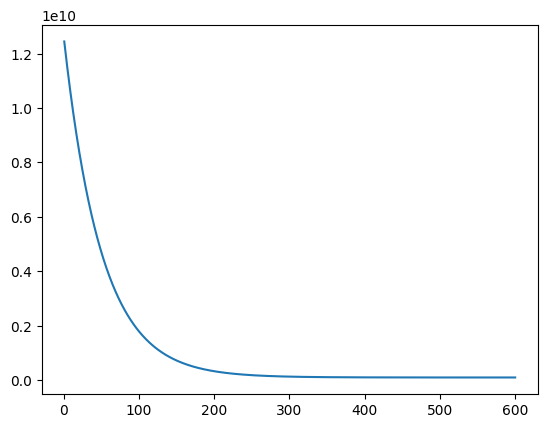

In [96]:
univariate_linear_regression_helper(X_train_univariate, Y_train, 0.01, X_test_univariate, Y_test, "batch")

Metrics the model achieved against test data using stochastic gradient descent
******* Univariate linear regression using gradient descent***********
The Parameters of our model are:  [69.63421567724927, 6.885379692654528]
The Mean square error of model is:  53.29326996870821
The Mean absolute error of mode is:  5.1554139248340185


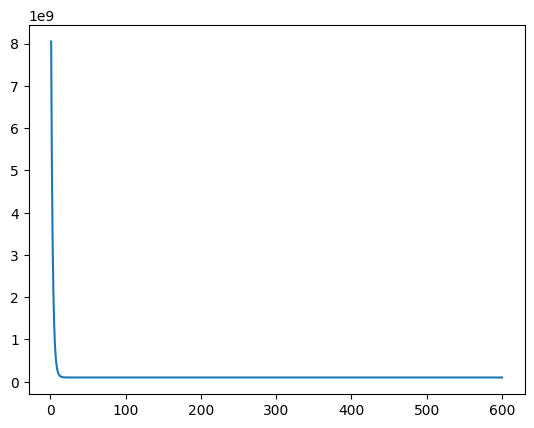

In [97]:
univariate_linear_regression_helper(X_train_univariate, Y_train, 0.0001, X_test_univariate, Y_test, "stochastic" )

# 2.Multivariate linear regression using gradient descent to get optimal parameters

In [98]:
def multivariate_linear_regression_helper(X, Y, alpha,  X_test, Y_test, gradient_method = "batch"):

    epochs = 1000
    costs, theta = [], []
    if gradient_method == "batch":
        costs, theta = batch_gradient_descent(X,epochs,alpha, Y)
    else:
        costs, theta = stochastic_gradient_descent(X, epochs, alpha, Y)

    predictions = []

    for i in range(len(Y_test)):
        predictions.append(prediction(X_test[i], theta))

    metrics = Metrics()
    Mse = metrics.MSE(predictions, Y_test)
    Mae = metrics.MAE(predictions, Y_test)

    if gradient_method == 'batch':
        print("Metrics the model achieved against test data using batch gradient ascent")
    else:
        print("Metrics the model achieved against test data using stochastic gradient ascent")

    print("******* Multivariate linear regression using gradient descent***********")
    print("The Parameters of our model are: ", theta)
    print("The Mean square error of model is: " , Mse)
    print("The Mean absolute error of mode is: ", Mae)

    iterations = [i for i in range(1,epochs+1)]
    # plt.plot(iterations,costs)
    # plt.show();


In [99]:

#This is taking around 10 minutes to execute, as all features are taken as input features and epochs = 1000
#Tried with less epochs and higher alpha but then it is not converging to the optimal. So these are near optimal
#settings but taking time.

multivariate_linear_regression_helper(X_train_multi_all, Y_train, 0.1, X_test_multi_all, Y_test, "batch")

Metrics the model achieved against test data using batch gradient ascent
******* Multivariate linear regression using gradient descent***********
The Parameters of our model are:  [69.21639352148641, 3.1246543223672667, 2.4978809894186385, 1.381951375035137, 1.7066858758305081, 1.7119761420969193]
The Mean square error of model is:  41.906365538464854
The Mean absolute error of mode is:  4.675630461394384


In [107]:
multivariate_linear_regression_helper(X_train_multi_all, Y_train, 0.1, X_test_multi_all, Y_test, "stochastic")

Metrics the model achieved against test data using stochastic gradient ascent
******* Multivariate linear regression using gradient descent***********
The Parameters of our model are:  [69.69945992096264, 12.166204793404928, 6.749173987972568, -0.24771122520077968, 2.0117147956630803, 0.33882455267541994]
The Mean square error of model is:  123.14252688336828
The Mean absolute error of mode is:  8.91395663332302


Insights:
    
If we see the Closed form solution of univariate linear regression model matches with
gradient descent of univariate linear regression model

We can also observe that  stochastic gradient descent giving us near optimal answer but not as much as that of
batch gradient descent that matches with closed form solution very well.

**What do you think we can do better?**

**How do you know the best seperator/predictor/fit of the data is straight line?**

**What if seperator/best file is non-linear?**

# What Is Polynomial Regression?

Polynomial regression is another form of regression in which the maximum power of the independent variable is more than 1. In this regression technique, the best fit line is not a straight line instead it is in the form of a curve.

For Example, Quadratic regression, or regression with second order polynomial, is given by the following equation:

![](https://drive.google.com/uc?export=view&id=1i5IqnuaM__XbJvZjQMdxMIuAD4RCTce1)

So do you think it’s always better to use higher order polynomials to fit the data set. Sadly, no. Basically, we have created a model that fits our training data well but fails to estimate the real relationship among variables beyond the training set. Therefore our model performs poorly on the test data. This problem is called as over-fitting. We also say that the model has high variance and low bias.

![](https://drive.google.com/uc?export=view&id=11-sfnLjxqzMNixPUXZiwTgn3kjM__Ezo)

# Bias-Variance Tradeoff



![](https://drive.google.com/uc?export=view&id=1xAzlSVpeMF1iBY8HA2qjMbbNYx54sMb0)

![](https://drive.google.com/uc?export=view&id=1fcVguV0JWCimtQMwRMn84Nd_zaPWH0x8)

As we add more and more parameters to our model, its complexity increases, which results in increasing variance and decreasing bias, i.e., overfitting. So we need to find out one optimum point in our model where the decrease in bias is equal to increase in variance. In practice, there is no analytical way to find this point. So how to deal with high variance or high bias?

To overcome underfitting or high bias, we can basically add new parameters to our model so that the model complexity increases, and thus reducing high bias.

Now, how can we overcome Overfitting for a regression model?

Basically there are several methods to overcome overfitting, two of them are
1. Reduce the model complexity
2. Regularization

Here we would be discussing about Regularization in detail and how to use it to make your model more generalized.

# Polynomial Regression

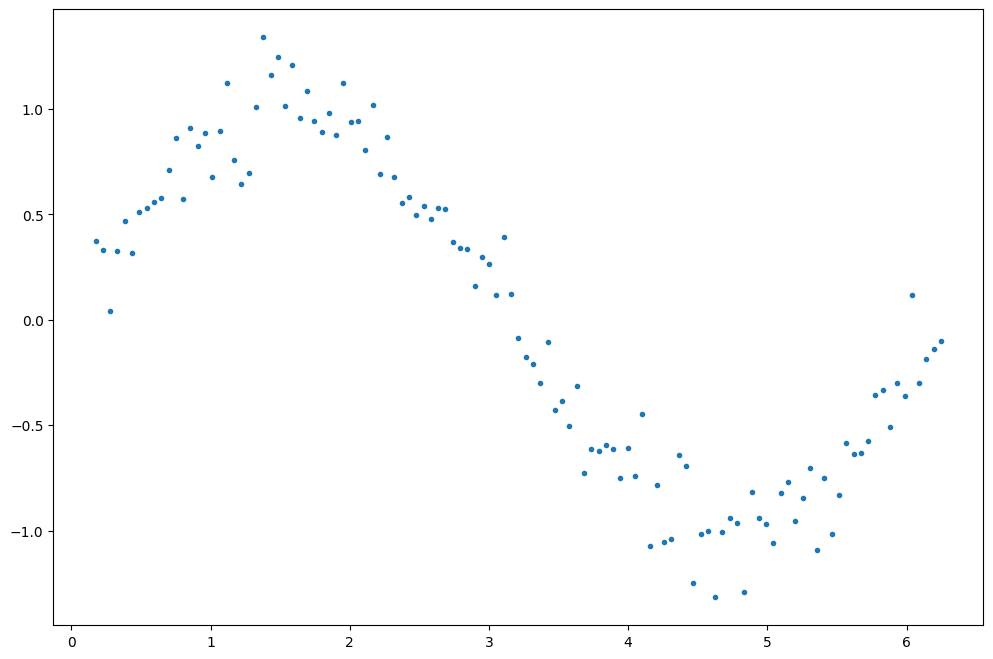

In [100]:
import matplotlib.pyplot as plt

#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])
#Setting seed for reproducability
np.random.seed(10)
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
#Printing first 5 rows of the data
data.head()
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.');

In [101]:
# polynomial regression with powers of x from 2 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


Creating test and train sets

In [102]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)
train.shape


(73, 16)

1. Linear Regression with 1 feature

Training Error 0.21314430958173897
Testing Error 0.18974033118165393


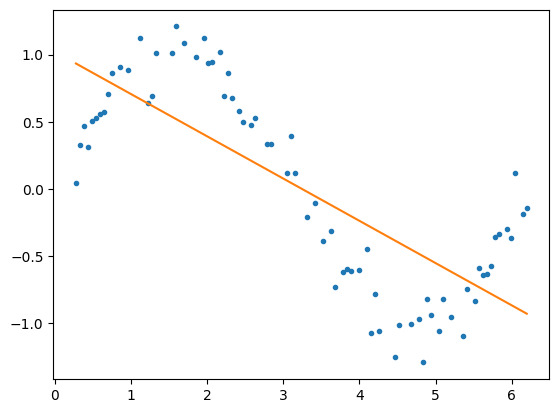

In [103]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

train.drop('y', axis=1).head()

#Linear Regression with one features
independent_variable_train = X_train[:,0:1]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train,'.')
plt.plot(X_train[:,0:1],y_train_pred);


Linear regression with three features



Training Error 0.021472481770965682
Testing Error 0.030451878881971598


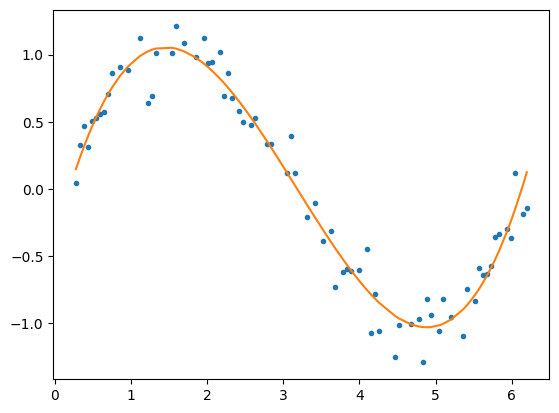

In [104]:
train.drop('y', axis=1).columns

independent_variable_train = X_train[:,0:3]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train,'.')
plt.plot(X_train[:,0:1],y_train_pred);

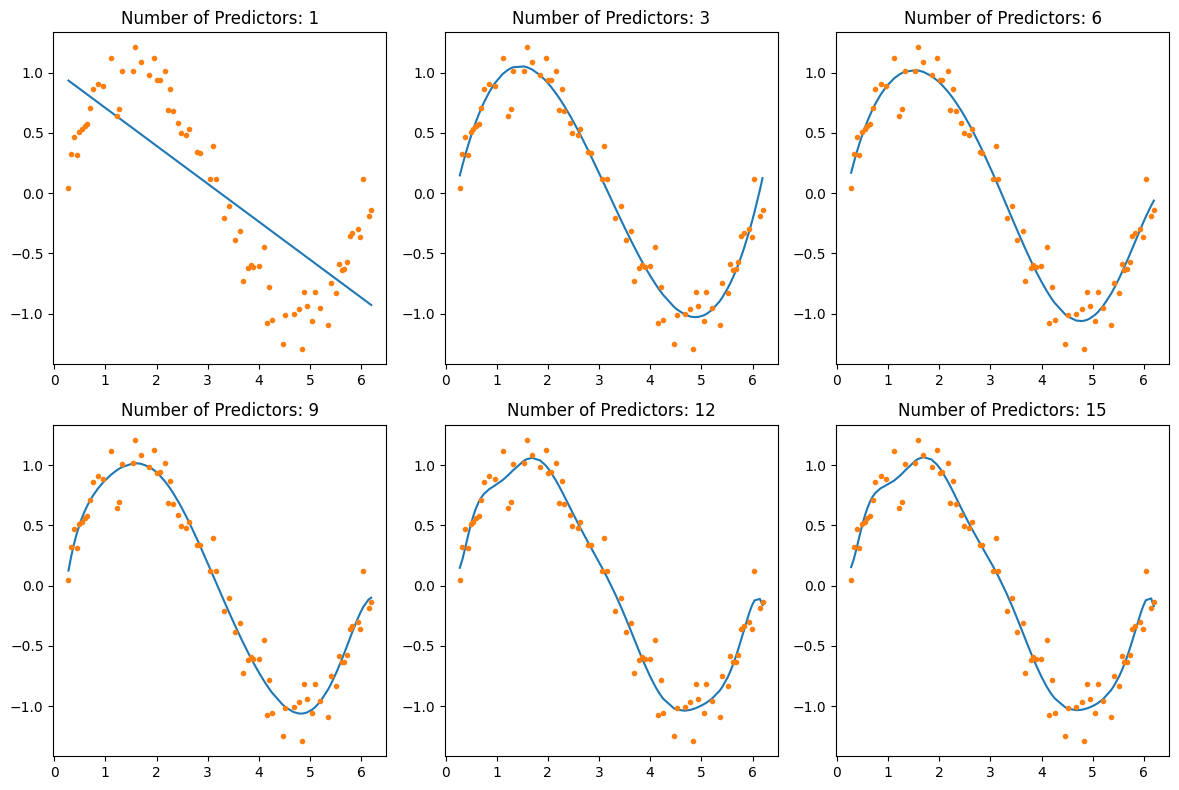

In [105]:
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):

    #Fit the model
    linreg = LinearRegression()
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)

    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)

        plt.plot(train_x[:,0:1],train_y,'.')

        plt.title('Number of Predictors: %d'%features)

    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]

    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret
  #Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test

    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

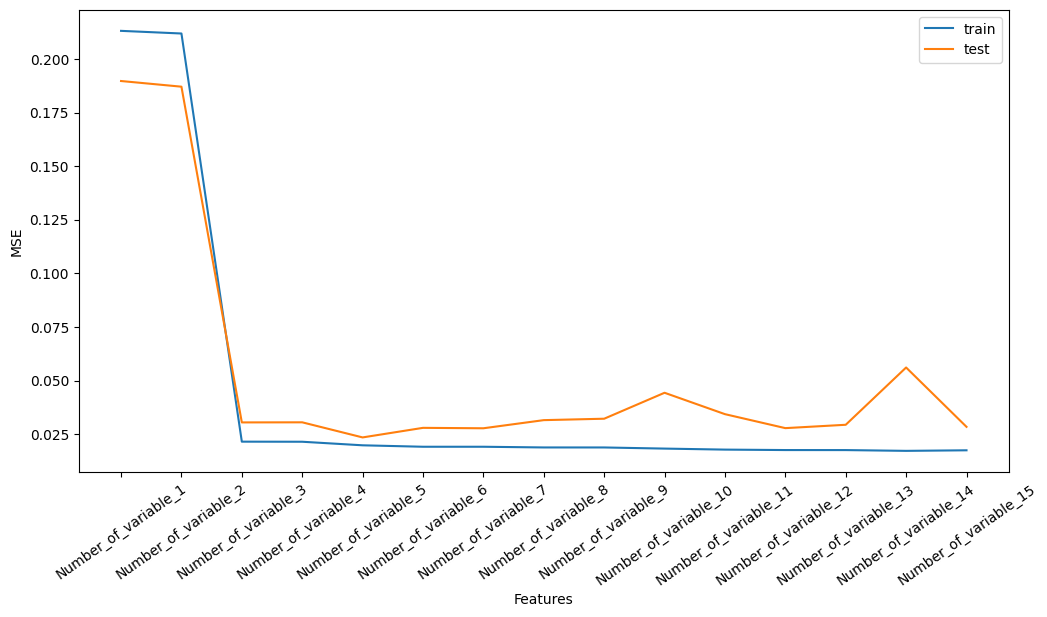

In [106]:
plt.figure(figsize=(12,6))
plt.plot(coef_matrix_simple['mrss_train'])
plt.plot(coef_matrix_simple['mrss_test'])
plt.xlabel('Features')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.xticks(rotation = 35)
plt.show();


# Penalized Estimation



You've seen that when the number of predictors increases, your model complexity increases, with a higher chance of overfitting as a result. We've previously seen fairly ad-hoc variable selection methods (such as forward/backward selection), to simply select a few variables from a longer list of variables as predictors.

Now, instead of completely "deleting" certain predictors from a model (which is equal to setting coefficients equal to zero), wouldn't it be interesting to just reduce the values of the coefficients to make them less sensitive to noise in the data? *Penalized estimation* operates in a way where parameter shrinkage effects are used to make some or all of the coefficients smaller in magnitude (closer to zero). Some of the penalties have the property of performing both variable selection (setting some coefficients exactly equal to zero) and shrinking the other coefficients.

1. They reduce model complexity
2. They may prevent overfitting
3. Some of them may perform variable selection at the same time (when coefficients are set to 0)
4. They can be used to counter multicollinearity


Penalized estimation is a commonly used *regularization* technique. Regularization is a general term used when one tries to battle overfitting.

Two commonly-used models that use penalized estimation are *ridge regression* and *lasso regression*. While linear regression has been in use since the 1800s, ridge regression was proposed in 1970 and lasso regression in 1996.

# What is Generalization?

The term ‘generalization’ refers to a model’s ability to adapt and react appropriately to previously unseen, fresh data chosen from the same distribution as the model’s initial input. In other words, generalization assesses a model’s ability to process new data and generate accurate predictions after being trained on a training set.

